# Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dqn import QAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2')

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 200
batch_size = 32

# define and train agent
agent = QAgent(env)
returns = agent.training(env, batch_size, episodes)

env.close()

episode: 1/200, return: 107, epsilon: 0.86
episode: 2/200, return: 82, epsilon: 0.73
episode: 3/200, return: 125, epsilon: 0.57
episode: 4/200, return: 137, epsilon: 0.43
episode: 5/200, return: 104, epsilon: 0.35
episode: 6/200, return: 186, epsilon: 0.24
episode: 7/200, return: 190, epsilon: 0.17
episode: 8/200, return: 210, epsilon: 0.11
episode: 9/200, return: 264, epsilon: 0.10
episode: 10/200, return: 265, epsilon: 0.10
episode: 26/200, return: 433, epsilon: 0.10
episode: 27/200, return: 90, epsilon: 0.10
episode: 30/200, return: 478, epsilon: 0.10
episode: 31/200, return: 236, epsilon: 0.10
episode: 33/200, return: 466, epsilon: 0.10
episode: 34/200, return: 415, epsilon: 0.10
episode: 35/200, return: 222, epsilon: 0.10
episode: 36/200, return: 299, epsilon: 0.10
episode: 37/200, return: 204, epsilon: 0.10
episode: 38/200, return: 393, epsilon: 0.10
episode: 39/200, return: 193, epsilon: 0.10
episode: 41/200, return: 221, epsilon: 0.10
episode: 42/200, return: 163, epsilon: 0.10

In [3]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 100 episodes: {np.mean(returns[-100:])}')

Average return: 399.37
Average return last 100 episodes: 401.07


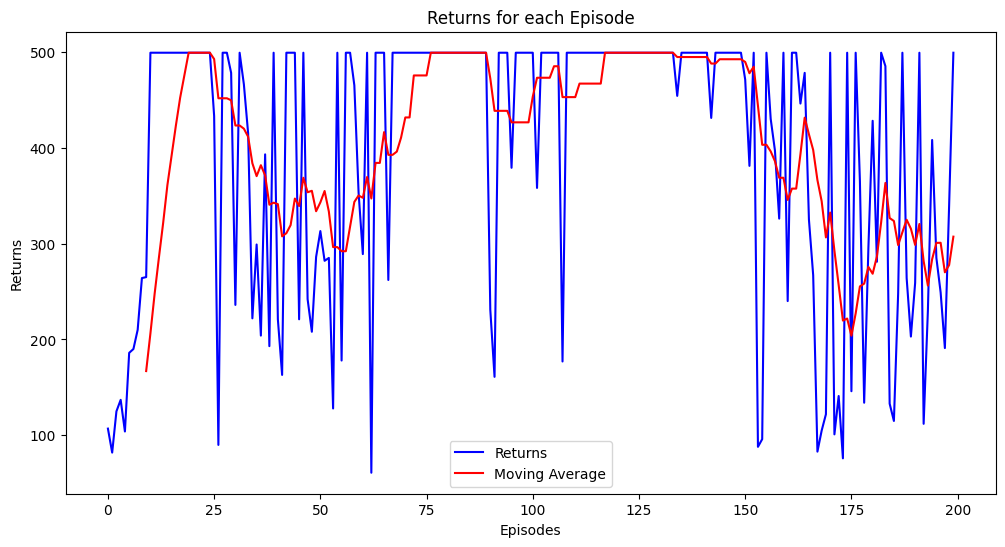

In [4]:
MA = pd.Series(returns).rolling(window=10).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=returns, label='Returns', color='blue')
sns.lineplot(data=MA, label='Moving Average', color='red')
plt.ylabel('Returns')
plt.xlabel('Episodes')
plt.title('Returns for each Episode')
plt.legend()
plt.show()